# Class

# LCR in series

![img](lcr.png)

Resonating frequency
\begin{equation}
f_0=\frac{1}{2\pi\sqrt{LC}}
\end{equation}

Quality factor
\begin{equation}
Q=\frac{1}{R}\sqrt{\frac{L}{C}}
\end{equation}

Inductive reactance
\begin{equation}
X_L=2\pi fL
\end{equation}

Capacitive reactance
\begin{equation}
X_C=\frac{1}{2\pi fC}
\end{equation}

Impedance
\begin{equation}
z=\sqrt{(X_L-X_C)^2+R^2}
\end{equation}

Phase angle
\begin{equation}
\phi=\tan^{-1}(\frac{X_L-X_C}{R})
\end{equation}

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class lcr():
    def __init__(self,L,C,R,f):
        self.L     = L
        self.C     = C
        self.R     = R
        self.f     = f
        
    def fo(self):
        fr=(2*np.pi*np.sqrt(self.L*self.C))**-1
        return fr
    
    def Q(self):
        ql=np.sqrt(self.L/self.C)/self.R
        return ql
    
    def inductiveReactance(self):
        XL=2*np.pi*self.L*self.f 
        return XL
    
    def capacitiveReactance(self):
        XC=1/(2*np.pi*self.C*self.f)
        return XC
    
    def impedance(self):
        imp=np.sqrt((self.inductiveReactance()-self.capacitiveReactance())**2+self.R**2)
        return imp
    
    def phase(self):
        pi=np.arctan((self.inductiveReactance()-self.capacitiveReactance())/self.R)*180/np.pi
        return pi    # degree
    

In [3]:
l=0.1    #inductance in H
c=1e-6   #capacitance in F
r=10     # resistance in ohm
v=100    #voltage in V

In [4]:
d=lcr(l,c,r,100)
print('Resonating frequency:',d.fo(),'Hz')
print('Q factor:',d.Q())

Resonating frequency: 503.2921210448704 Hz
Q factor: 31.622776601683796


In [5]:
freq=np.arange(10,1500,10)
g=lcr(l,c,r,freq)
xl=g.inductiveReactance()
xc=g.capacitiveReactance()
z=g.impedance()
ph=g.phase()
I=v/z  # current
vr=I*r  #p.d.across reisitor
vl=I*xl  #p.d.across inductor
vc=I*xc  #p.d.across capacitor
power =v*I*np.cos(ph*np.pi/180)

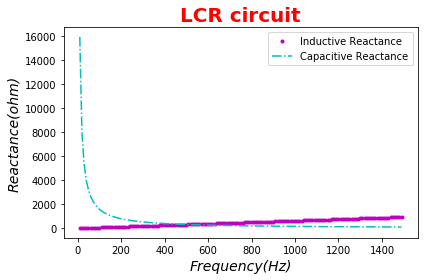

In [6]:
plt.plot(freq,xl,'m.',label='Inductive Reactance')
plt.plot(freq,xc,'c-.',label='Capacitive Reactance')
plt.xlabel(xlabel="Frequency(Hz)",fontsize=14,fontstyle='italic',color="black")
plt.ylabel(ylabel="Reactance(ohm)",fontsize=14,fontstyle='italic',color="black")
plt.title(label="LCR circuit",fontsize=20,fontweight='bold',color="red")
plt.legend()
plt.tight_layout()
plt.savefig("image\LCR1.pdf", dpi = 600) # dpi dot per inch
plt.show()
plt.close()

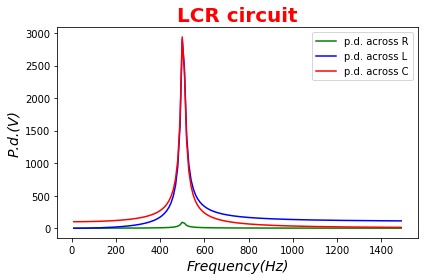

In [7]:
plt.plot(freq,vr,'g-',label='p.d. across R')
plt.plot(freq,vl,'b-',label='p.d. across L')
plt.plot(freq,vc,'r-',label='p.d. across C')
plt.xlabel(xlabel="Frequency(Hz)",fontsize=14,fontstyle='italic',color="black")
plt.ylabel(ylabel="P.d.(V)",fontsize=14,fontstyle='italic',color="black")
plt.title(label="LCR circuit",fontsize=20,fontweight='bold',color="red")
plt.legend()
plt.tight_layout()
plt.savefig("image\LCR2.pdf", dpi = 600)
plt.show()
plt.close()

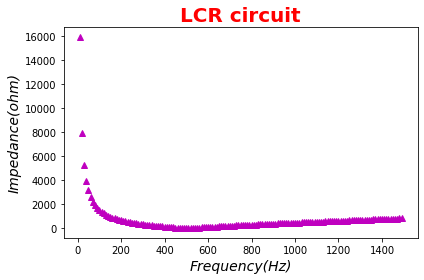

In [8]:
plt.plot(freq,z,'m^')
plt.xlabel(xlabel="Frequency(Hz)",fontsize=14,fontstyle='italic',color="black")
plt.ylabel(ylabel="Impedance(ohm)",fontsize=14,fontstyle='italic',color="black")
plt.title(label="LCR circuit",fontsize=20,fontweight='bold',color="red")
plt.tight_layout()
plt.savefig("image\LCR3.pdf", dpi = 600)
plt.show()
plt.close()

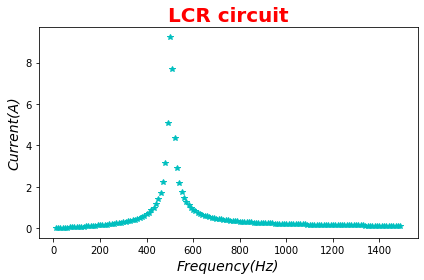

In [9]:
plt.plot(freq,I,'c*')
plt.xlabel(xlabel="Frequency(Hz)",fontsize=14,fontstyle='italic',color="black")
plt.ylabel(ylabel="Current(A)",fontsize=14,fontstyle='italic',color="black")
plt.title(label="LCR circuit",fontsize=20,fontweight='bold',color="red")
plt.tight_layout()
plt.savefig("image\LCR4.pdf", dpi = 600)
plt.show()
plt.close()

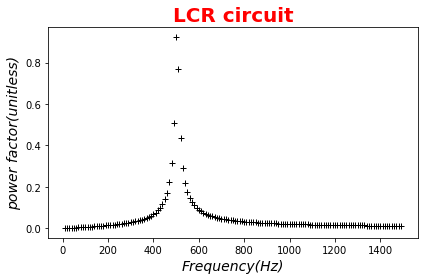

In [10]:
plt.plot(freq,np.cos(ph*np.pi/180),'k+')
plt.xlabel(xlabel="Frequency(Hz)",fontsize=14,fontstyle='italic',color="black")
plt.ylabel(ylabel="power factor(unitless)",fontsize=14,fontstyle='italic',color="black")
plt.title(label="LCR circuit",fontsize=20,fontweight='bold',color="red")
plt.tight_layout()
plt.savefig("image\LCR7.pdf", dpi = 600)
plt.show()
plt.close()

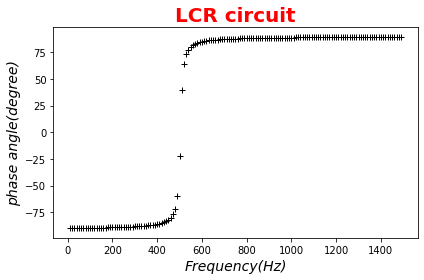

In [11]:
plt.plot(freq,ph,'k+')
plt.xlabel(xlabel="Frequency(Hz)",fontsize=14,fontstyle='italic',color="black")
plt.ylabel(ylabel="phase angle(degree)",fontsize=14,fontstyle='italic',color="black")
plt.title(label="LCR circuit",fontsize=20,fontweight='bold',color="red")
plt.tight_layout()
plt.savefig("image\LCR5.pdf", dpi = 600)
plt.show()
plt.close()

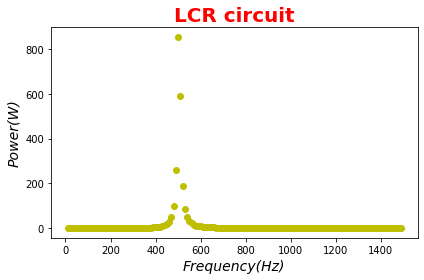

In [12]:
plt.plot(freq,power,'yo')
plt.xlabel(xlabel="Frequency(Hz)",fontsize=14,fontstyle='italic',color="black")
plt.ylabel(ylabel="Power(W)",fontsize=14,fontstyle='italic',color="black")
plt.title(label="LCR circuit",fontsize=20,fontweight='bold',color="red")
plt.tight_layout()
plt.savefig("image\LCR6.pdf", dpi = 600)
plt.show()
plt.close()

In [13]:
data={}
data.update({'Freqency':freq,'in.rect.':xl,'cap.Rect':xc,'imp.':z,'curren':I,'phase':ph,'power':power})

In [14]:
DF = pd.DataFrame(data)
DF

,Freqency,in.rect.,cap.Rect,imp.,curren,phase,power
0,10,6.283185,15915.494309,15909.214267,0.006286,-89.963986,0.000395
1,20,12.566371,7957.747155,7945.187077,0.012586,-89.927886,0.001584
2,30,18.849556,5305.164770,5286.324672,0.018917,-89.891615,0.003578
3,40,25.132741,3978.873577,3953.753482,0.025292,-89.855085,0.006397
4,50,31.415927,3183.098862,3151.698800,0.031729,-89.818206,0.010067
...,...,...,...,...,...,...,...
144,1450,911.061870,109.762030,801.362236,0.124788,89.285002,0.155719
145,1460,917.345055,109.010235,808.396673,0.123702,89.291224,0.153021
146,1470,923.628240,108.268669,815.420892,0.122636,89.297330,0.150396
147,1480,929.911425,107.537124,822.435099,0.121590,89.303323,0.147842


In [15]:
DF.to_csv("data/lcr.csv")  #save data in csv format in excel